# Data Exploratory Analysis

pip install wordcloud

In [138]:
pip install pywaffle

## Summary

- wordcould 
- tfidf

## Imports

In [3]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import collections


from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm import tqdm
from sklearn.feature_extraction import text
from nltk.tokenize import word_tokenize
from collections import Counter
from pywaffle import Waffle

## Most common words between artists 

Top 30 words used in Eminem's songs. 

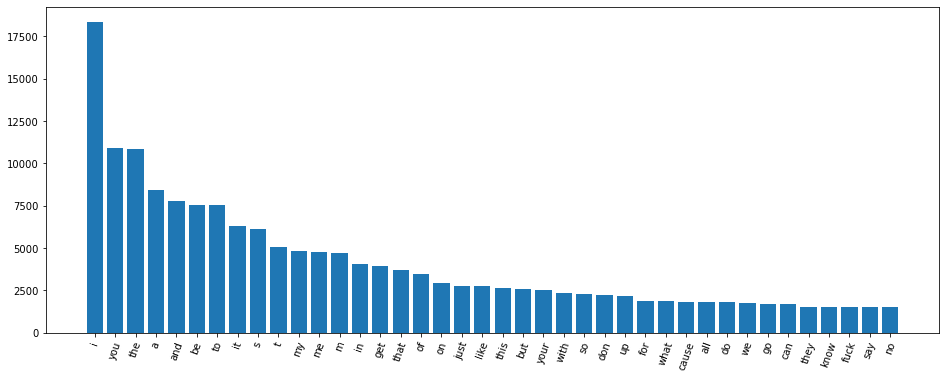

In [65]:

def tokenized_lyrics(lyrics):
    # à voir comment améliorer en supprimant les stopwords + ponctuation
    return word_tokenize(str(lyrics))

def dict_freq_words(tok_lyrics):
    return dict(sorted(collections.Counter(tok_lyrics).items(), key = lambda item : item[1], reverse = True))


text= " ".join( str(lyrics) for lyrics in df2['Clean Lyrics'])  

d= dict_freq_words(tokenized_lyrics(text))

top40= list(d.items())[:40]

plt.bar(range(len(top40)), [val[1] for val in top40], align='center')
plt.xticks(range(len(top40)), [val[0] for val in top40])
plt.xticks(rotation=70)
plt.show()

We can see that most of these words are not even words and do not help us much to comprehend the data.

In [146]:
# Look at the most common top words --> add them to the stop word list

# Let's first pull out the top 20 words for each artist
words = []
for filename in os.listdir('C:/Maria/2A/ProjetPython2A/completed_data'):
    data = pd.read_csv(f'C:/Maria/2A/ProjetPython2A/completed_data/{filename}')
    text= " ".join( str(lyrics) for lyrics in data['Clean Lyrics'])  

    d= dict_freq_words(tokenized_lyrics(text))
    top20= list(d.items())[:20]
    
    top = [word for (word, count) in top20]
    for t in top:
        words.append(t)

In [147]:
Counter(words).most_common()

[('the', 6),
 ('you', 6),
 ('to', 6),
 ('me', 6),
 ('a', 6),
 ('s', 6),
 ('my', 6),
 ('it', 6),
 ('t', 6),
 ('that', 6),
 ('in', 5),
 ('and', 5),
 (',', 4),
 ('I', 4),
 ('(', 4),
 (')', 4),
 ('like', 4),
 ('on', 4),
 ('of', 3),
 ('for', 3),
 ('m', 3),
 ('And', 2),
 ('your', 2),
 ('i', 2),
 ('be', 2),
 ('get', 2),
 ('yeah', 1),
 ('what', 1),
 ('You', 1),
 ('know', 1),
 ('just', 1),
 ('we', 1),
 ('all', 1)]

#### Let us remove some stop words

In [149]:
#some of our stop words 
mots= [word for word, count in Counter(words).most_common() if count > 2]+['ve', 'ain', 'ma', 'd', 'URLCopyEmbedCopy', 'em', 'wan', 'na', 'gon', 'bout', 'u','ah','oh','ooh','ya','ll', 'don','cause']
from sklearn.feature_extraction import text
#adding our stop words to already known english stop words
top_words = text.ENGLISH_STOP_WORDS.union(mots)

### Drake Wordcloud

In [127]:
df=pd.read_csv('C:/Maria/2A/ProjetPython2A/completed_data/final_discography_Drake.csv')

In [128]:
# Start with one review:
text  = " ".join(lyrics for lyrics in df['Clean Lyrics'][:216])

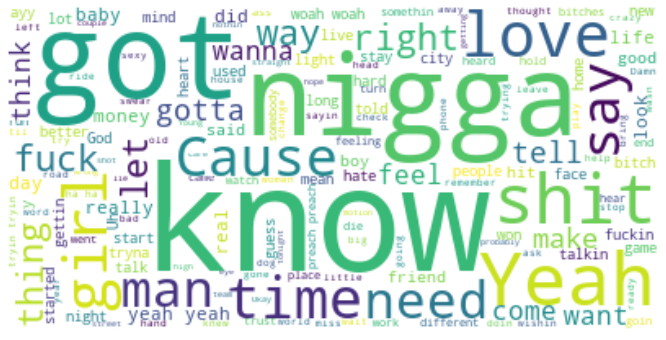

In [129]:
wordcloud = WordCloud(stopwords=top_words,  background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Eminem Wordcloud 

In [130]:
df2=pd.read_csv('C:/Maria/2A/ProjetPython2A/completed_data/final_discography_Eminem.csv')

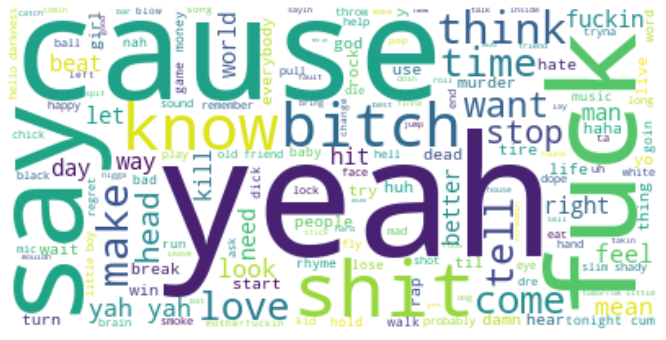

In [131]:
text2= " ".join(lyrics for lyrics in df2['Clean Lyrics'][:79])

wordcloud = WordCloud(stopwords=top_words, background_color="white").generate(text2)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud comparaison 

In [2]:
artist_names = ["Adele","Bruno Mars", "Drake","Eminem", "Kanye West","Lana Del Rey"]

In [133]:
wc = WordCloud(stopwords=top_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

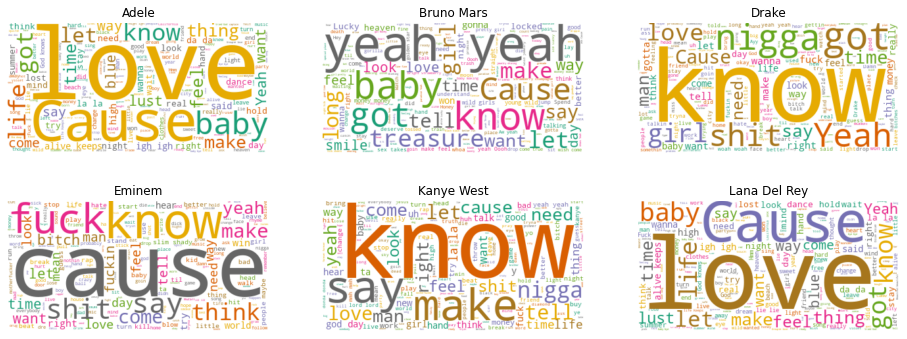

In [134]:
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [16, 6]

artist_names = ["Adele","Bruno Mars", "Drake","Eminem", "Kanye West","Lana Del Rey"]

# Create subplots for each comedian
    
index=0 

for filename in os.listdir('C:/Maria/2A/ProjetPython2A/completed_data'):
    data = pd.read_csv(f'C:/Maria/2A/ProjetPython2A/completed_data/{filename}')
    text= " ".join( str(lyrics) for lyrics in data['Clean Lyrics'])    
    wc.generate(text)
    
    plt.subplot(2, 3, index +1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(artist_names[index])
    if index < len(artist_names)-1:
        index+=1 
        
plt.show()
    

Some singers tend to use more profanity than others. 

### Amout of words

In [152]:
dict_love = {}
dict_f = {}
dict_s = {}
index=0 
for filename in os.listdir('C:/Maria/2A/ProjetPython2A/completed_data'):
    data = pd.read_csv(f'C:/Maria/2A/ProjetPython2A/completed_data/{filename}')
    text= " ".join( str(lyrics) for lyrics in data['Clean Lyrics'])  

    d= dict_freq_words(tokenized_lyrics(text))
 
    dict_love[artist_names[index]]= d['love']
    dict_f[artist_names[index]]= d['fuck']
    dict_s[artist_names[index]]= d['shit']
    if index < len(artist_names)-1:
        index+=1 
    
        
dict_f

{'Adele': 3,
 'Bruno Mars': 1,
 'Drake': 247,
 'Eminem': 1539,
 'Kanye West': 282,
 'Lana Del Rey': 3}

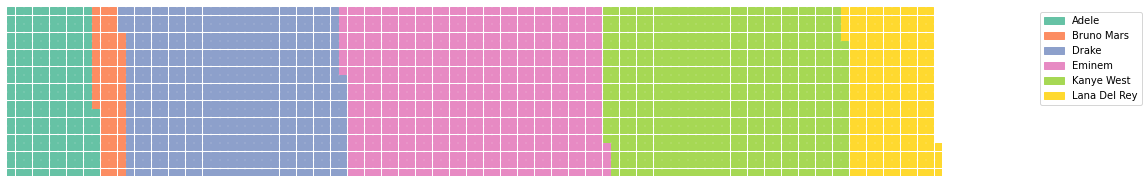

In [155]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=20, 
    values=dict_love, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

Might be due to the number of albums of each artist.

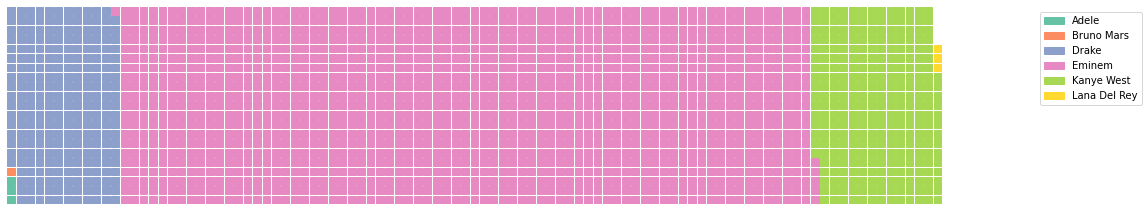

In [161]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=21, 
    values=dict_f, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

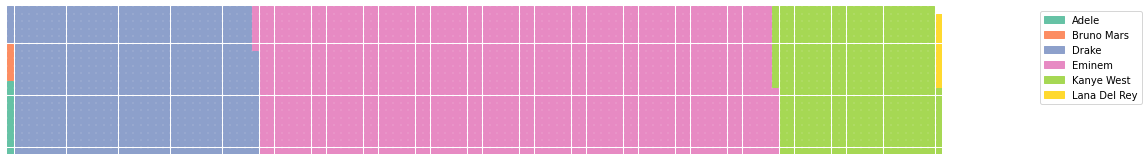

In [162]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=20, 
    values=dict_s, 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

Clearly Eminem swears the most followed by Drake and Kanye West.

## Sentiment analysis

In [2]:
pip install textblob

In [8]:
from textblob import TextBlob

TextBlob finds all of the words and phrases that it can assign a polarity and subjectivity to, and averages all of them together.

In [15]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

d = {'Lyrics': [], 'Artist':artist_names}  

for filename in os.listdir('C:/Maria/2A/ProjetPython2A/artist_data'):
    data = pd.read_csv(f'C:/Maria/2A/ProjetPython2A/artist_data/{filename}')
    text= " ".join( str(lyrics) for lyrics in data['Clean Lyrics'])  
    d['Lyrics'].append(text)

df=pd.DataFrame(d)


    
df['polarity'] = df['Lyrics'].apply(pol)
df['subjectivity'] = df['Lyrics'].apply(sub)

df

,Lyrics,Artist,polarity,subjectivity
0,i ll be take flower to the cemetery of my hear...,Adele,0.134245,0.529070
1,hey hey hey i get a condo in manhattan baby gi...,Bruno Mars,0.173244,0.468357
2,i love you i love you i love you until i until...,Drake,0.074037,0.492698
3,thus far this album ha provide musical accompa...,Eminem,-0.022028,0.503660
4,lyric from drink champ snippet if i let go i g...,Kanye West,0.077574,0.491994
5,i remember you well in the chelsea hotel you b...,Lana Del Rey,0.101734,0.520259


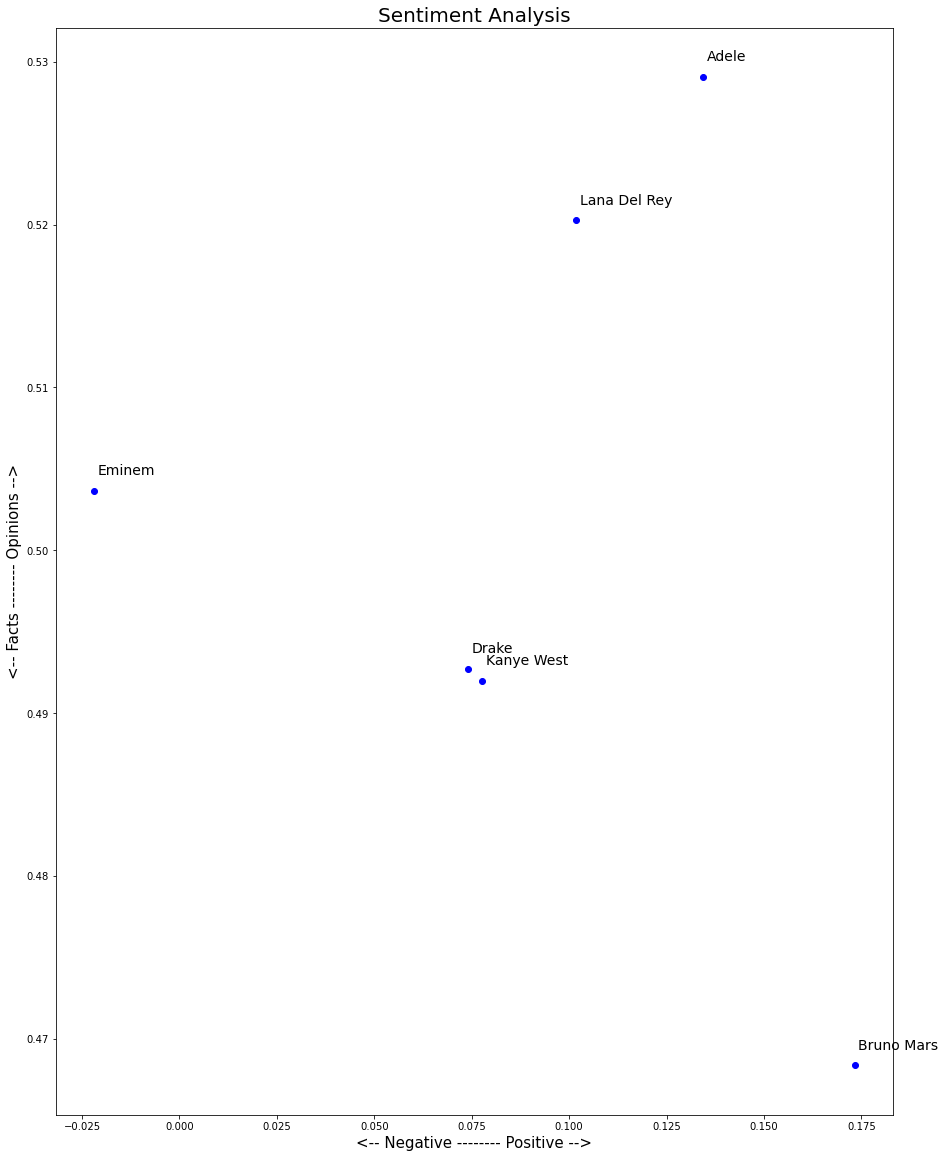

In [27]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 20]

for index, artist in enumerate(df.index):
    x = df.polarity.loc[artist]
    y = df.subjectivity.loc[artist]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df['Artist'][index], fontsize=14)
    
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Over time 

Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). \ A corpus' sentiment is the average of these.
Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

Kayne West and Drake are very close. 